In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras_tuner import Hyperband
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns


# Load the CSV file into a DataFrame
df = pd.read_csv(r'D:\Downloads\stockprice\google.csv')  # Uncomment and load your dataset
# For demonstration, let's assume df is already defined with a 'Close' column



In [2]:
## Display basic DataFrame information

print("First 5 rows of the DataFrame:")
print(df.head())  
# Displays the first 5 rows of the DataFrame, useful for getting an initial look at the data.

print("\nLast 5 rows of the DataFrame:")
print(df.tail())  
# Displays the last 5 rows of the DataFrame, helpful to check the ending portion of the data.

print("\nInformation about the DataFrame:")
print(df.info())  
# Provides an overview of the DataFrame, including column names, non-null counts, and data types.

print("\nSummary statistics of the DataFrame:")
print(df.describe())  
# Displays descriptive statistics for numeric columns, including count, mean, standard deviation, min, max, and percentiles.

print("\nCount of unique values per column:")
print(df.nunique())  
# Displays the count of unique values for each column, useful for understanding the variability in the dataset.

print("\nShape of the DataFrame (rows, columns):")
print(df.shape)  
# Outputs the shape of the DataFrame as a tuple (number of rows, number of columns), indicating its size.


First 5 rows of the DataFrame:
         Date       High        Low       Open      Close      Volume  \
0  2004-08-19  51.835709  47.800831  49.813290  49.982655  44871361.0   
1  2004-08-20  54.336334  50.062355  50.316402  53.952770  22942874.0   
2  2004-08-23  56.528118  54.321388  55.168217  54.495735  18342897.0   
3  2004-08-24  55.591629  51.591621  55.412300  52.239197  15319808.0   
4  2004-08-25  53.798351  51.746044  52.284027  52.802086   9232276.0   

   Adj Close  
0  49.982655  
1  53.952770  
2  54.495735  
3  52.239197  
4  52.802086  

Last 5 rows of the DataFrame:
            Date         High          Low         Open        Close  \
4312  2021-10-05  2747.239990  2680.000000  2680.000000  2723.540039   
4313  2021-10-06  2757.040039  2689.729980  2692.510010  2747.080078   
4314  2021-10-07  2803.089111  2771.260010  2777.260010  2783.709961   
4315  2021-10-08  2806.340088  2788.586914  2798.120117  2801.120117   
4316  2021-10-11  2815.272949  2776.129883  2796.

The given DataFrame consists of stock market data, with the following columns:

Date: The date of the recorded data.

High: The highest price of the stock on the given day.

Low: The lowest price of the stock on the given day.

Open: The opening price of the stock on the given day.

Close: The closing price of the stock on the given day.

Volume: The total number of shares traded during the day.

Adj Close: The adjusted closing price of the stock after accounting for corporate actions like splits or dividends.

High:

Mean: $639.68 indicates the average highest price of the stock over the dataset.
Std: $561.78 suggests significant variation in the high prices.
Range: From $50.68 (min) to $2936.41 (max).


Low:

Mean: $627.62, representing the average lowest price.
Std: $552.07, showing a high spread of low prices.
Range: From $47.80 (min) to $2912.29 (max).


Open:

Mean: $633.60, the average opening price.
Std: $556.53, reflecting high variability.
Range: From $49.41 (min) to $2918.99 (max).


Close:

Mean: $633.85, the average closing price.
Std: $557.26, with noticeable daily variation.
Range: From $49.82 (min) to $2916.84 (max).


Volume:

Mean: 6.52 million shares traded daily.
Std: 7.83 million, indicating some days with very high trading activity.
Range: From 7,922 (min) to 82.54 million (max).
Adj Close (Adjusted Closing Price):
Same as the Close statistics, as adjustments don't change these values in this summary.

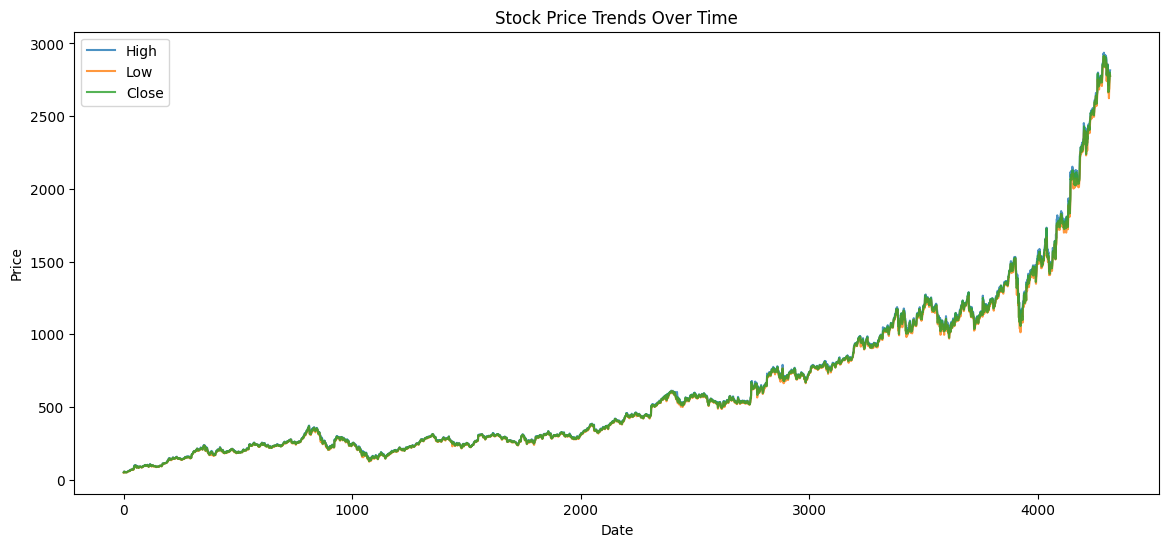

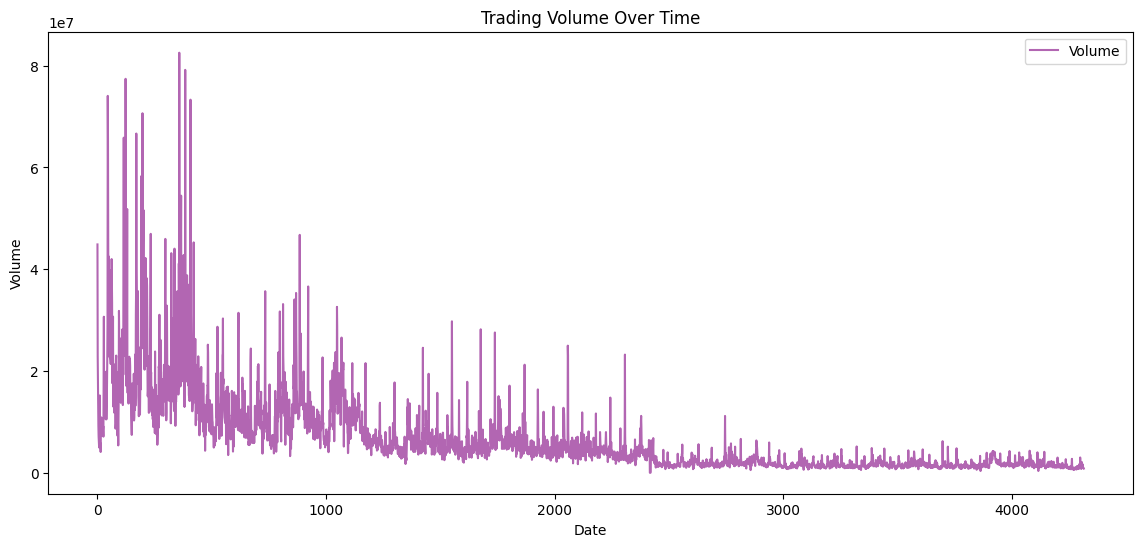

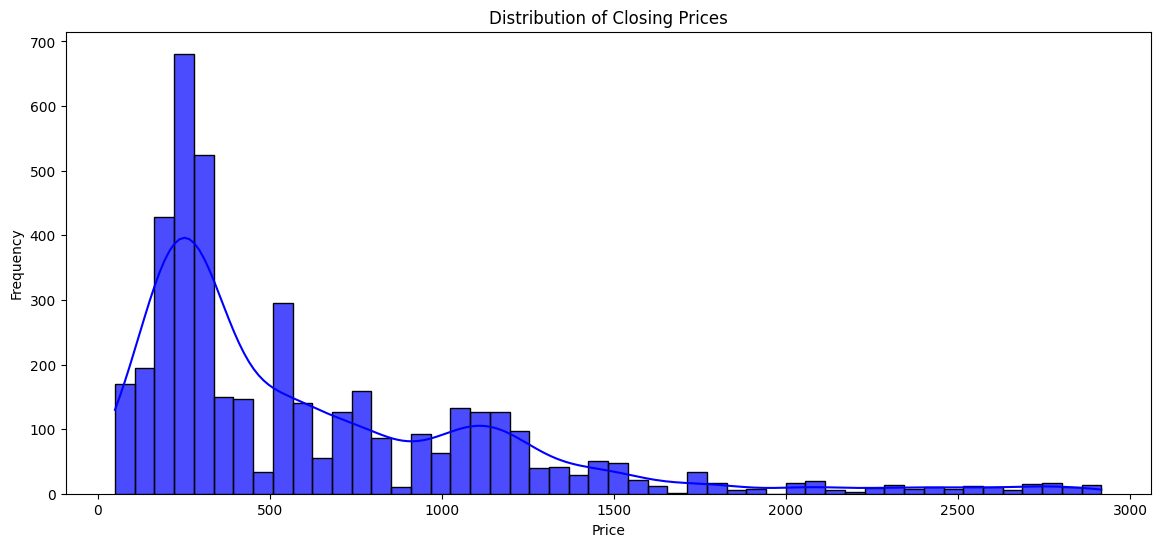

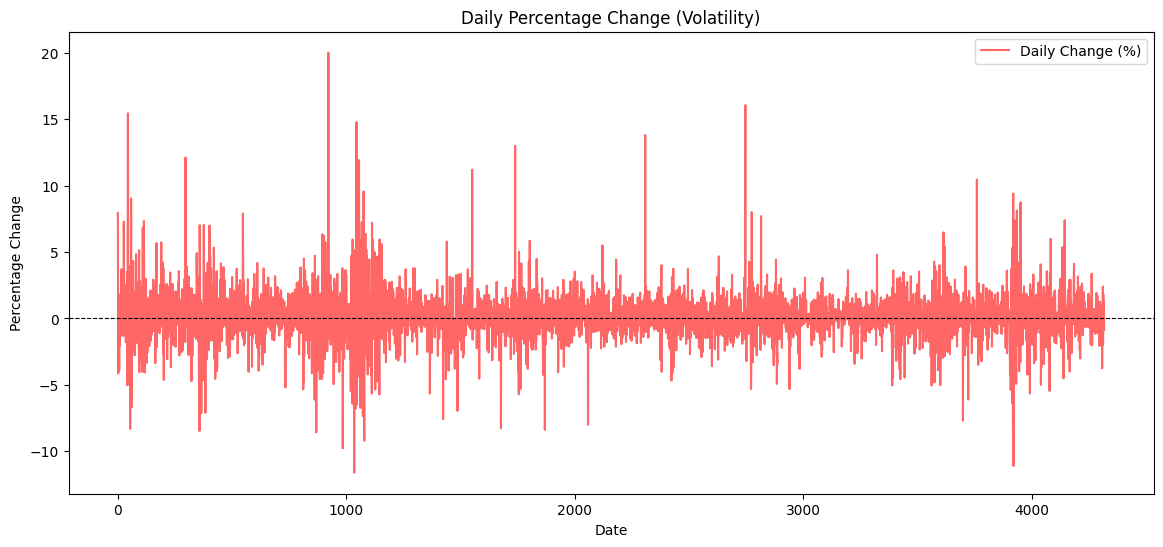

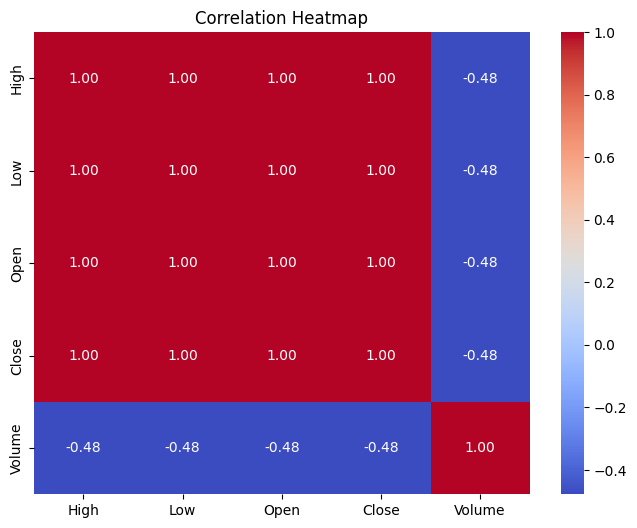

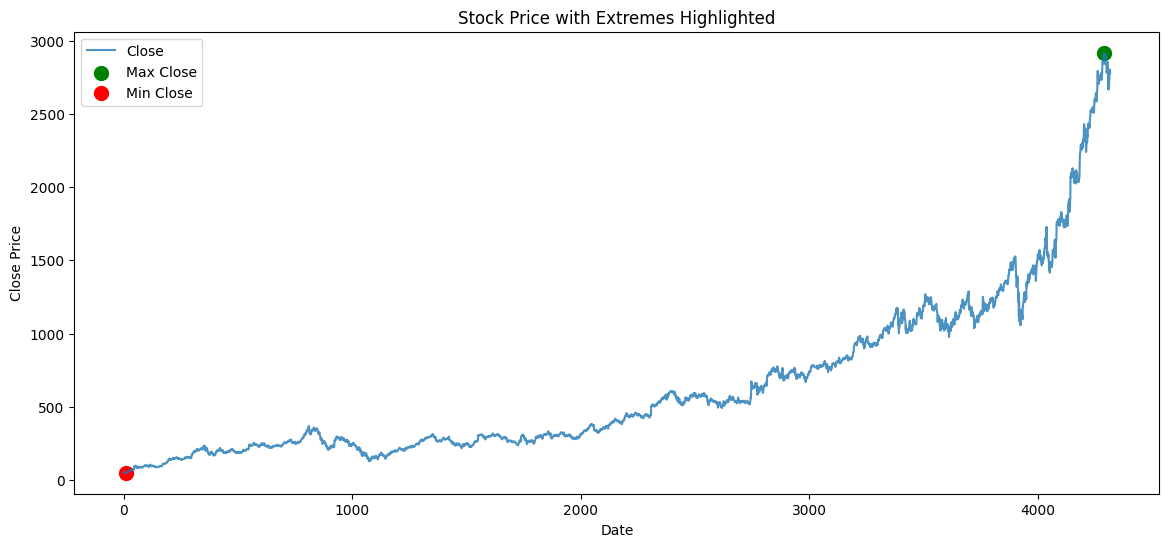

In [3]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['High'], label='High', alpha=0.8)
plt.plot(df.index, df['Low'], label='Low', alpha=0.8)
plt.plot(df.index, df['Close'], label='Close', alpha=0.8)
plt.title('Stock Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Volume'], label='Volume', color='purple', alpha=0.6)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


plt.figure(figsize=(14, 6))
sns.histplot(df['Close'], bins=50, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of Closing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


# Calculate daily percentage change
df['Daily Change (%)'] = df['Close'].pct_change() * 100

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Daily Change (%)'], label='Daily Change (%)', color='red', alpha=0.6)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Daily Percentage Change (Volatility)')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(df[['High', 'Low', 'Open', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Highlight significant highs and lows
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Close', alpha=0.8)
plt.scatter(df['Close'].idxmax(), df['Close'].max(), color='green', label='Max Close', s=100)
plt.scatter(df['Close'].idxmin(), df['Close'].min(), color='red', label='Min Close', s=100)
plt.title('Stock Price with Extremes Highlighted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [6]:
# Preprocess the data
sc = MinMaxScaler(feature_range=(0, 1))
data = df[['Close']].values
scaled_data = sc.fit_transform(data)

In [16]:
# Add scaled data to DataFrame
df['Close_Scaled'] = scaled_data
print(df)

            Date         High          Low         Open        Close  \
0     2004-08-19    51.835709    47.800831    49.813290    49.982655   
1     2004-08-20    54.336334    50.062355    50.316402    53.952770   
2     2004-08-23    56.528118    54.321388    55.168217    54.495735   
3     2004-08-24    55.591629    51.591621    55.412300    52.239197   
4     2004-08-25    53.798351    51.746044    52.284027    52.802086   
...          ...          ...          ...          ...          ...   
4312  2021-10-05  2747.239990  2680.000000  2680.000000  2723.540039   
4313  2021-10-06  2757.040039  2689.729980  2692.510010  2747.080078   
4314  2021-10-07  2803.089111  2771.260010  2777.260010  2783.709961   
4315  2021-10-08  2806.340088  2788.586914  2798.120117  2801.120117   
4316  2021-10-11  2815.272949  2776.129883  2796.000000  2776.949951   

          Volume    Adj Close  Daily Change (%)  Close_Scaled  
0     44871361.0    49.982655               NaN      0.000057  
1     2

In [7]:
# Create training and test datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [8]:
# Create the input and output for the LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the model building function
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50)))  # Adding another LSTM layer
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    
    # Learning rate as a hyperparameter
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')), loss='mean_squared_error')
    return model

# Initialize the Keras Tuner
tuner = Hyperband(build_model, 
                  objective='val_loss', 
                  max_epochs=10, 
                  factor=3,
                  directory='my_dir', 
                  project_name='helloworld')

# Perform hyperparameter tuning
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(f"Units: {best_hps.get('units')}")
print(f"Dropout: {best_hps.get('dropout')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# Build the best model
best_model = tuner.hypermodel.build(best_hps)

Reloading Tuner from my_dir\helloworld\tuner0.json
Best Hyperparameters:
Units: 200
Dropout: 0.30000000000000004
Learning Rate: 0.002116649247540636


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Train the best model
early_stop = EarlyStopping(monitor='val_loss', patience=3)
best_model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[early_stop])

# Evaluate the model on the test set
test_loss = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Predicting the stock prices
predictions = best_model.predict(X_test)
predictions = sc.inverse_transform(predictions)  # Inverse transform to get original scale


Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 27s 208ms/step - loss: 9.8231e-04 - val_loss: 1.1454e-04
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 16s 193ms/step - loss: 6.5599e-05 - val_loss: 1.0676e-04
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 17s 193ms/step - loss: 7.7588e-05 - val_loss: 1.5138e-04
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 19s 223ms/step - loss: 5.0313e-05 - val_loss: 5.6753e-05
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 19s 228ms/step - loss: 5.1475e-05 - val_loss: 6.2463e-05
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 18s 214ms/step - loss: 4.7878e-05 - val_loss: 4.7943e-05
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 18s 212ms/step - loss: 3.9620e-05 - val_loss: 4.8077e-05
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 18s 211ms/step - loss: 4.5372e-05 - val_loss: 1.2648e-04
Epoch 9/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 18s 213ms/step - loss: 3.5337e-05 - val_loss: 6.8029e-05
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 2.6802e-04
Test Loss: 0.0006425158935599029
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step


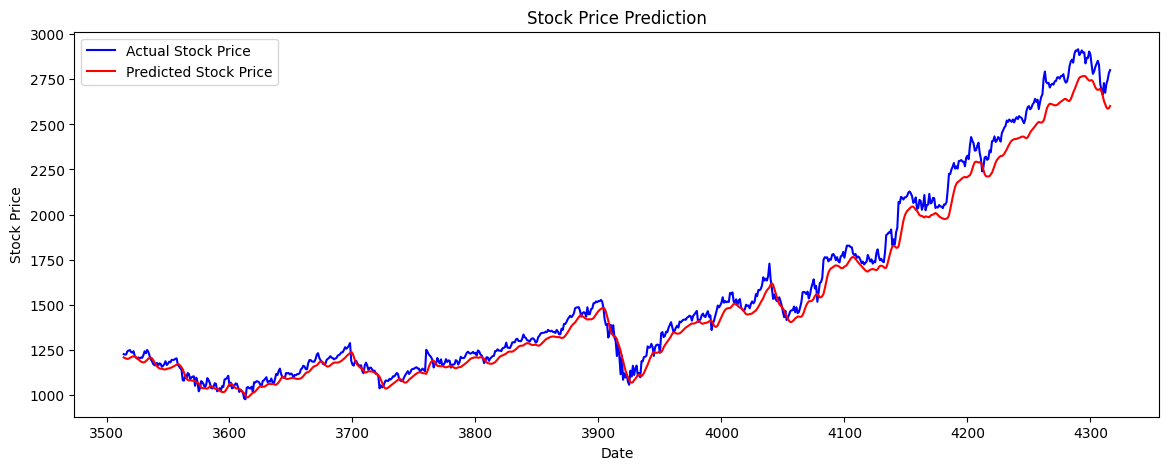

In [10]:
# Assuming 'predictions' is the array of predicted values and 'y_test' is the actual values
# Flatten predictions if necessary
predictions = predictions.flatten()  # Ensure predictions is 1D

# Prepare the actual stock prices for the plot
# The actual values to plot should start from the index of the first prediction
actual_stock_prices = sc.inverse_transform(y_test.reshape(-1, 1)).flatten()  # Ensure it's 1D

# Create the index for the x-axis based on the test data
# Adjust the index to match the length of the predictions
x_index = df.index[train_size + 60 + 1:train_size + 60 + 1 + len(predictions)]

# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(x_index, actual_stock_prices, color='blue', label='Actual Stock Price')
plt.plot(x_index, predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()